# Twitter Sentiment Analysis

# Step-1: Import the Necessary Dependencies

In [1]:
pip install wordcloud

In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Step-2: Read and Load the Dataset

In [3]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Twitter.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
609349,0,2223680398,Thu Jun 18 08:34:45 PDT 2009,NO_QUERY,sicknastyalison,F on the final :/ F for the year. Helllllo sum...
1027017,4,1932380221,Tue May 26 21:21:08 PDT 2009,NO_QUERY,Nice_Kitty,doing my biology homeworkt see you
1046390,4,1957660082,Fri May 29 01:11:42 PDT 2009,NO_QUERY,almayfield,is sitting at his computer eating a chicken an...
954353,4,1824825260,Sun May 17 03:06:03 PDT 2009,NO_QUERY,sassisam,@melissahoyer well it is very entertaining but...
1044669,4,1957467020,Fri May 29 00:35:31 PDT 2009,NO_QUERY,lemelpblog,@honeydirt why thank you my dear thank you ki...


# Step-3: Exploratory Data Analysis

3.1: Five top records of data

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


3.2: Columns/features in data

In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

3.3: Length of the dataset

In [6]:
print('length of data is', len(df))

length of data is 1048576


3.4: Shape of data

In [7]:
df.shape

(1048576, 6)

3.5: Data information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


3.6: Datatypes of all columns

In [9]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

3.7: Checking for null values

In [10]:
np.sum(df.isnull().any(axis=1))

0

3.8: Rows and columns in the dataset

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1048576


3.9: Check unique target values

In [12]:
df['target'].unique()

array([0, 4], dtype=int64)

3.10: Check the number of target values

In [13]:
df['target'].nunique()

2

# Step-4: Data Visualization of Target Variables

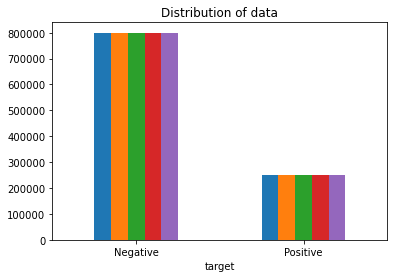

In [14]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

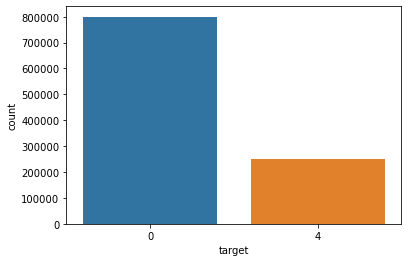

In [15]:
sns.countplot(x='target', data=df)

# Step-5: Data Preprocessing

5.1: Selecting the text and Target column for our further analysis

In [16]:
data=df[['text','target']]

5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

In [17]:
#data['target'] = data['target'].replace(4,1)

data.loc[data['target'] == 4, 'target'] = 1

5.3: Printing unique values of target variables

In [18]:
data['target'].unique()

array([0, 1], dtype=int64)

5.4: Separating positive and negative tweets

In [19]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

5.5: Taking one-fourth of the data so we can run it on our machine easily

In [20]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

5.6: Combining positive and negative tweets

In [56]:
dataset = pd.concat([data_pos, data_neg])

5.7: Making statement text in lowercase

In [22]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

5.8: Defining set containing all stopwords in English.

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 
             'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

5.9: Cleaning and removing the above stop words list from the tweet text

In [24]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

5.10: Cleaning and removing punctuations

In [25]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.11: Cleaning and removing repeating characters

In [26]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.12: Cleaning and removing URLs

In [27]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.13: Cleaning and removing numeric numbers

In [28]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

5.14: Getting tokenization of tweet text

In [29]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

5.15: Applying stemming

In [30]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

5.16: Applying lemmatizer

In [31]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

5.17: Separating input feature and label

In [32]:
X=data.text
y=data.target

5.18: Plot a cloud of words for negative tweets

In [46]:
#data_neg = data['text'][:800000]
#plt.figure(figsize = (20,20))
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#               collocations=False).generate(" ".join(data_neg))
#plt.imshow(wc)

5.19: Plot a cloud of words for positive tweets

In [34]:
#data_pos = data['text'][800000:]
#wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#              collocations=False).generate(" ".join(data_pos))
#plt.figure(figsize = (20,20))
#plt.imshow(wc)

# Step-6: Splitting Our Data Into Train and Test Subsets

In [35]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# Step-7: Transforming the Dataset Using TF-IDF Vectorizer

7.1: Fit the TF-IDF Vectorizer

In [36]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

C:\Users\Manoj R\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


7.2: Transform the data using TF-IDF Vectorizer

In [37]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Step-8: Function for Model Evaluation

In [38]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Step-9: Model Building

8.1: Model-1

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     40097
           1       0.67      0.66      0.66     12332

    accuracy                           0.84     52429
   macro avg       0.78      0.78      0.78     52429
weighted avg       0.84      0.84      0.84     52429



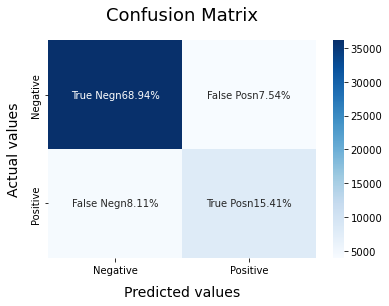

In [39]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

8.2: Plot the ROC-AUC Curve for model-1

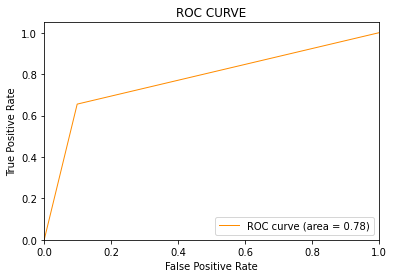

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

8.3: Model-2:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     40097
           1       0.74      0.63      0.68     12332

    accuracy                           0.86     52429
   macro avg       0.81      0.78      0.80     52429
weighted avg       0.86      0.86      0.86     52429



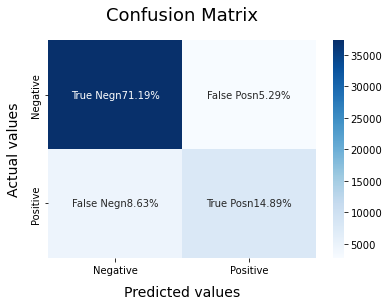

In [41]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

8.4: Plot the ROC-AUC Curve for model-2

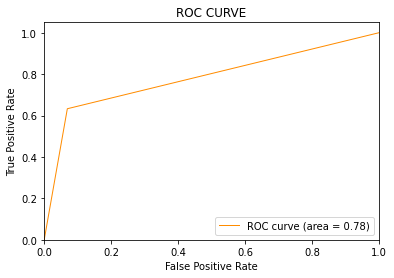

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

8.5: Model-3

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     40097
           1       0.78      0.61      0.69     12332

    accuracy                           0.87     52429
   macro avg       0.83      0.78      0.80     52429
weighted avg       0.86      0.87      0.86     52429



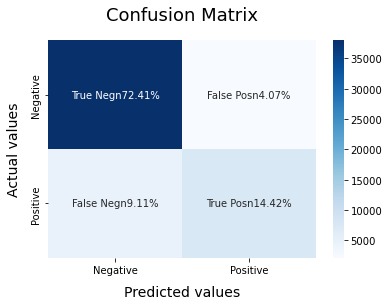

In [43]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

8.6: Plot the ROC-AUC Curve for model-3

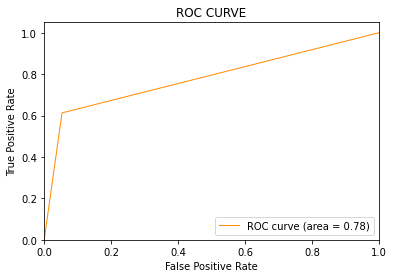

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Step-10: Model Evaluation


Upon evaluating all the models, we can conclude the following details i.e.

Accuracy: As far as the accuracy of the model is concerned, Logistic Regression performs better than SVM, 
which in turn performs better than Bernoulli Naive Bayes.

F1-score: The F1 Scores for class 0 and class 1 are :
(a) For class 0: Bernoulli Naive Bayes(accuracy = 0.90) < SVM (accuracy =0.91) < Logistic Regression (accuracy = 0.92)
(b) For class 1: Bernoulli Naive Bayes (accuracy = 0.66) < SVM (accuracy = 0.68) < Logistic Regression (accuracy = 0.69)

AUC Score: All three models have the same ROC-AUC score.

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset.

In our problem statement, Logistic Regression follows the principle of Occam’s Razor, which defines that 
for a particular problem statement, if the data has no assumption, then the simplest model works the best. 
Since our dataset does not have any assumptions and Logistic Regression is a simple model. 
Therefore, the concept holds true for the above-mentioned dataset.

# What is Twitter Sentiment Analysis?

Twitter sentiment analysis analyzes the sentiment or emotion of tweets. It uses natural language processing and machine learning algorithms to classify tweets automatically as positive, negative, or neutral based on their content. It can be done for individual tweets or a larger dataset related to a particular topic or event.

# Why is Twitter Sentiment Analysis Important?

Understanding Customer Feedback: By analyzing the sentiment of customer feedback, companies can identify areas where they need to improve their products or services.
Reputation Management: Sentiment analysis can help companies monitor their brand reputation online and quickly respond to negative comments or reviews.
Political Analysis: Sentiment analysis can help political campaigns understand public opinion and tailor their messaging accordingly.
Crisis Management: In the event of a crisis, sentiment analysis can help organizations monitor social media and news outlets for negative sentiment and respond appropriately.
Marketing Research: Sentiment analysis can help marketers understand consumer behavior and preferences, and develop targeted advertising campaigns.

# How to Do Twitter Sentiment Analysis?


In this article, we aim to analyze Twitter sentiment analysis using machine learning algorithms, the sentiment of tweets provided from the Sentiment140 dataset by developing a machine learning pipeline involving the use of three classifiers (Logistic Regression, Bernoulli Naive Bayes, and SVM)along with using Term Frequency- Inverse Document Frequency (TF-IDF). The performance of these classifiers is then evaluated using accuracy and F1 Scores.

For data preprocessing, we will be using Natural Language Processing’s (NLP) NLTK library.



# Twitter Sentiment Analysis: Problem Statement

In this project, we try to implement an NLP Twitter sentiment analysis model that helps to overcome the challenges of sentiment classification of tweets. We will be classifying the tweets into positive or negative sentiments. The necessary details regarding the dataset involving the Twitter sentiment analysis project are:
    
The dataset provided is the Sentiment140 Dataset which consists of 1,600,000 tweets that have been extracted using the Twitter API. The various columns present in this Twitter data are:

target: the polarity of the tweet (positive or negative)
    
ids: Unique id of the tweet
    
date: the date of the tweet
    
flag: It refers to the query. If no such query exists, then it is NO QUERY.
    
user: It refers to the name of the user that tweeted
    
text: It refers to the text of the tweet

# Twitter Sentiment Analysis: Project Pipeline

The various steps involved in the Machine Learning Pipeline are:

Import Necessary Dependencies

Read and Load the Dataset

Exploratory Data Analysis

Data Visualization of Target Variables

Data Preprocessing

Splitting our data into Train and Test sets.

Transforming Dataset using TF-IDF Vectorizer

Function for Model Evaluation

Model Building

Model Evaluation

# Frequently Asked Questions

Q1. What are the use cases of Sentimental Analysis models in the real world?

A. Sentimental Analysis models are used in various industries for different purposes. Some examples are:

1. Using these models, we can get people’s opinions on social media platforms or social networking sites regarding specific topics.
2. Companies use these models to know the success or failure of their product by analyzing the sentiment of the product reviews and feedback from the people.
3. Health industries use these models for the text analysis of patients’ feedback and improve their services based on that.
4. We can also find new marketing trends and customer preferences using these models.

Q2. What are the steps for sentiment analysis of Twitter data in Python?

A. Given below are the steps for implementing Sentiment Analysis of Twitter in Python:

1. Firstly we will gather the required Tweets from Twitter.
2. We will clean the data using different pre-processing techniques.
3. After cleaning the data, we will create the sentimental analysis model using different machine learning algorithms.
4. We will analyze our Twitter data using our sentiment analysis model on the basis of sentiment score, i.e., a positive, negative, or neutral tweet.
5. Eventually, we will visualize the output from our model.

Q3. Which algorithm is used in Twitter sentiment analysis?

A. Machine Learning algorithms like Naive Bayes, Logistic Regression, SVM, and deep learning algorithms like RNN can be used to create Twitter Sentiment Analysis.